In [9]:
import matplotlib.pyplot as plt
from datetime import datetime
import json
from itertools import cycle
import itertools

import json

# 读取JSON文件
with open('E:\Project\Gits\FigureToolbox\FigureToolbox\Video\Output\modified_time_list_baseline.json', 'r') as file:
    data = json.load(file)


In [10]:

grouped_records = {}
for record in data:
    video = record["video"]
    if video not in grouped_records:
        grouped_records[video] = []
    grouped_records[video].append(record)

# 2. 对于每个视频编号的分组，按照记录的ID进行排序
for video, records in grouped_records.items():
    grouped_records[video] = sorted(records, key=lambda x: x["id"])

continuous_segments = []

continuous_records = []
# 3. 对于每个分组，检查记录的ID是否连续
for video, records in grouped_records.items():
    for _, group in itertools.groupby(enumerate(records), lambda x: x[1]["id"] - x[0]):
        continuous_segments.append(list(map(lambda x: x[1], group)))

         # 打印结果
    #print(f"视频编号: {video}")
    for segment in continuous_segments:
        # print("连续记录段:")
        records = []
        for record in segment:
            records.append(record)
        continuous_records.append(records)
        # print(records)

<Figure size 1000x600 with 0 Axes>

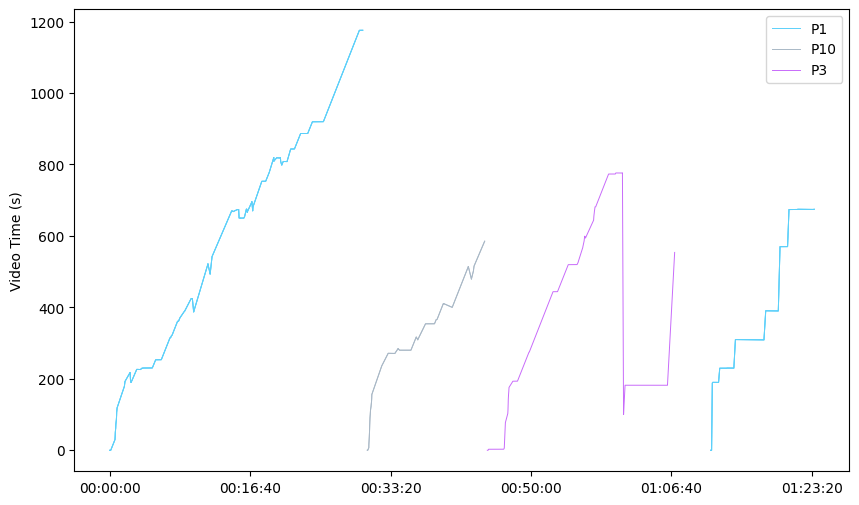

In [13]:
# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 存储第一个日期的时间戳
first_date_timestamp = None

# 3. 对于每个分组，检查记录的ID是否连续，并绘制折线图
plt.figure(figsize=(10, 6))
video_visited = {"P1": -1, "P2": -1, "P3": -1, "P4": -1, "P5": -1, "P6": -1, "P7": -1, "P8": -1, "P9": -1, "P10": -1}
colors_json = {"P1": "#5CD0FA",
    "P2": "#3565F6",
    "P3": "#C86BFA",
    "P4": "#EC345D",
    "P5": "#F19136",
    "P6": "#BEE448",
    "P7": "#049F9A",
    "P8": "#049F9A",
    "P9": "#C497B2",
    "P10": "#A9B8C6"}
for item in continuous_records:
    videostr = item[0]['video']
    
    date_points = []
    video_time_points = []
    for segment in item:
        if first_date_timestamp is None:
            first_date_timestamp = segment["time"]
        date_points.append((segment["time"] - first_date_timestamp) / 1000)  # 转换为秒
        video_time_points.append(segment["video_time"])
    
    if video_visited[videostr] == -1:
        plt.plot(date_points, video_time_points, linewidth=0.7, label=f"{videostr}",color=colors_json[videostr])
        video_visited[videostr] = 0
    else:
        plt.plot(date_points, video_time_points, linewidth=0.7,color=colors_json[videostr])

# 将横坐标的秒数转换为分钟:秒钟格式
plt.gca().xaxis.set_major_formatter(lambda x, pos: str(datetime.utcfromtimestamp(x).strftime('%H:%M:%S')))
# 添加标题和标签
# plt.title("Continuous Segments")
# plt.xlabel("Time (s)")
plt.ylabel("Video Time (s)")
plt.legend()

# 显示图形
plt.grid(False)
plt.show()